In [1]:
!pip install opendatasets
import opendatasets as od
import os
import pandas as pd

In [2]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
#!pip install --upgrade kaggle

In [4]:
#!pip install kaggle

In [5]:
import opendatasets as od

dataset = 'https://www.kaggle.com/datasets/mryasirturi/life-expentancy-dataset'
od.download(dataset, force=True)

import os

data_dir = './life-expentancy-dataset' 
os.listdir(data_dir)

import pandas as pd

# Check the exact file names in the directory
file_names = os.listdir(data_dir)
print(file_names)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: meenudsaini
Your Kaggle Key: ········


100%|██████████| 120k/120k [00:00<00:00, 488kB/s]


['Life Expectancy Data.csv']


In [6]:
# Assuming the file name has spaces, use quotes around the file name
file_path = os.path.join(data_dir, 'Life Expectancy Data.csv')

# Read the CSV file
df = pd.read_csv(file_path)
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [7]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [8]:
#Calculate the ratio of missing rows to total rows
df.isna().sum().sort_values(ascending=False)*100/len(df)

Population                  22.191967
HepatitisB                  18.822328
GDP                         15.248468
Tot_Exp                      7.692308
Alcohol                      6.603131
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
thinness_5to9_years          1.157250
thinness_1to19_years         1.157250
BMI                          1.157250
Polio                        0.646698
Diphtheria                   0.646698
Life_Expectancy              0.340368
Adult_Mortality              0.340368
HIV/AIDS                     0.000000
Country                      0.000000
Year                         0.000000
Measles                      0.000000
Percentage_Exp               0.000000
Infant_Deaths                0.000000
Status                       0.000000
Under_Five_Deaths            0.000000
dtype: float64

In [9]:
# handle null values using interpolation.
df_fixed = df.interpolate(method='ffill' ,inplace=False)
df_fixed.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
0             62     0.01       71.279624        65.0     1154  ...    6.0   
1             64     0.01       73.523582        62.0      492  ...   58.0   
2             66     0.01       73.219243        64.0      430  ...   62.0   
3             69     0.01       78.184215        67.0     2787  ...   67.0   
4             71     0.01        7.097109        68.0     3013  ...   68.0   

   Tot_Exp  Diphtheria  HIV/AIDS         GDP  Population  \
0     8.16        65.0       0.1  584.259210  33736494.0   
1     8.18        62.0       0.1  612.696514    327582.0   
2     8.13        64.0       0.1  631.744976  31731688.0   
3     8.52        67.0       0.1  669.959000   3696958.0   
4     7.87        68.0       0.1   63.537231   2978599.0   

   thinness_1to19_years  thinness_5to9_years  Income_Comp_Of_Resources  \
0                  17.2                 17.3                     0.479   
1                  17.5                 17.5                     0.476   
2                  17.7                 17.7                     0.470   
3                  17.9                 18.0                     0.463   
4                  18.2                 18.2                     0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [10]:
df_fixed.isna().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

In [11]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2938 non-null   float64
 4   Adult_Mortality           2938 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2938 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2938 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2938 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2938 non-null   float64
 13  Tot_Exp                   2938 non-null   float64
 14  Diphther

In [12]:
# Convert categorical variables to the appropriate data type
df_fixed['Country'] = df_fixed['Country'].astype('category')
#df_fixed['Status'] = df_fixed['Status'].astype('category')

In [13]:
# label encoding of Country column
le_country = LabelEncoder()
df_fixed['Country'] = le_country.fit_transform(df_fixed['Country'])

In [14]:
# Convert year to datetime type
df_fixed['Year'] = pd.to_datetime(df_fixed['Year'], format='%Y')

In [15]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Country                   2938 non-null   int32         
 1   Year                      2938 non-null   datetime64[ns]
 2   Status                    2938 non-null   object        
 3   Life_Expectancy           2938 non-null   float64       
 4   Adult_Mortality           2938 non-null   float64       
 5   Infant_Deaths             2938 non-null   int64         
 6   Alcohol                   2938 non-null   float64       
 7   Percentage_Exp            2938 non-null   float64       
 8   HepatitisB                2938 non-null   float64       
 9   Measles                   2938 non-null   int64         
 10  BMI                       2938 non-null   float64       
 11  Under_Five_Deaths         2938 non-null   int64         
 12  Polio               

In [16]:
df_fixed.describe()

Country  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean     95.096324        69.195643       164.816542      30.303948   
std      56.244904         9.536654       124.433748     117.926501   
min       0.000000        36.300000         1.000000       0.000000   
25%      46.000000        63.025000        74.000000       0.000000   
50%      93.000000        72.000000       144.000000       3.000000   
75%     145.000000        75.600000       228.000000      22.000000   
max     192.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage_Exp   HepatitisB        Measles          BMI  \
count  2938.000000     2938.000000  2938.000000    2938.000000  2938.000000   
mean      4.607270      738.251295    75.683799    2419.592240    38.020150   
std       4.044785     1987.914858    28.851806   11467.272489    20.175077   
min       0.010000        0.000000     1.000000       0.000000     1.000000   
25%       0.880000        4.685343    66.000000       0.000000    19.000000   
50%       3.765000       64.912906    89.000000      17.000000    43.000000   
75%       7.665000      441.534144    96.000000     360.250000    56.100000   
max      17.870000    19479.911610    99.000000  212183.000000    87.300000   

       Under_Five_Deaths        Polio      Tot_Exp   Diphtheria     HIV/AIDS  \
count        2938.000000  2938.000000  2938.000000  2938.000000  2938.000000   
mean           42.035739    82.307692     5.905211    82.075221     1.742103   
std           160.445548    23.636677     2.484620    23.917022     5.077785   
min             0.000000     3.000000     0.370000     2.000000     0.100000   
25%             0.000000    77.000000     4.260000    78.000000     0.100000   
50%             4.000000    93.000000     5.710000    93.000000     0.100000   
75%            28.000000    97.000000     7.440000    97.000000     0.800000   
max          2500.000000    99.000000    17.600000    99.000000    50.600000   

                 GDP    Population  thinness_1to19_years  thinness_5to9_years  \
count    2938.000000  2.938000e+03           2938.000000          2938.000000   
mean     7475.593613  1.316870e+07              4.955956             5.002553   
std     13728.461983  5.629984e+07              4.541403             4.670154   
min         1.681350  3.400000e+01              0.100000             0.100000   
25%       456.766527  1.364255e+05              1.600000             1.600000   
50%      1680.834893  1.289898e+06              3.400000             3.400000   
75%      6454.061607  7.394106e+06              7.300000             7.300000   
max    119172.741800  1.293859e+09             27.700000            28.600000   

       Income_Comp_Of_Resources    Schooling  
count               2938.000000  2938.000000  
mean                   0.631418    11.935671  
std                    0.210920     3.340202  
min                    0.000000     0.000000  
25%                    0.494000    10.100000  
50%                    0.684000    12.300000  
75%                    0.791000    14.100000  
max                    0.948000    20.700000

In [17]:
df_fixed.Country.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
#Correlation Analysis

In [19]:
df_fixed_corr = df_fixed.corr(numeric_only=True)

<Axes: >

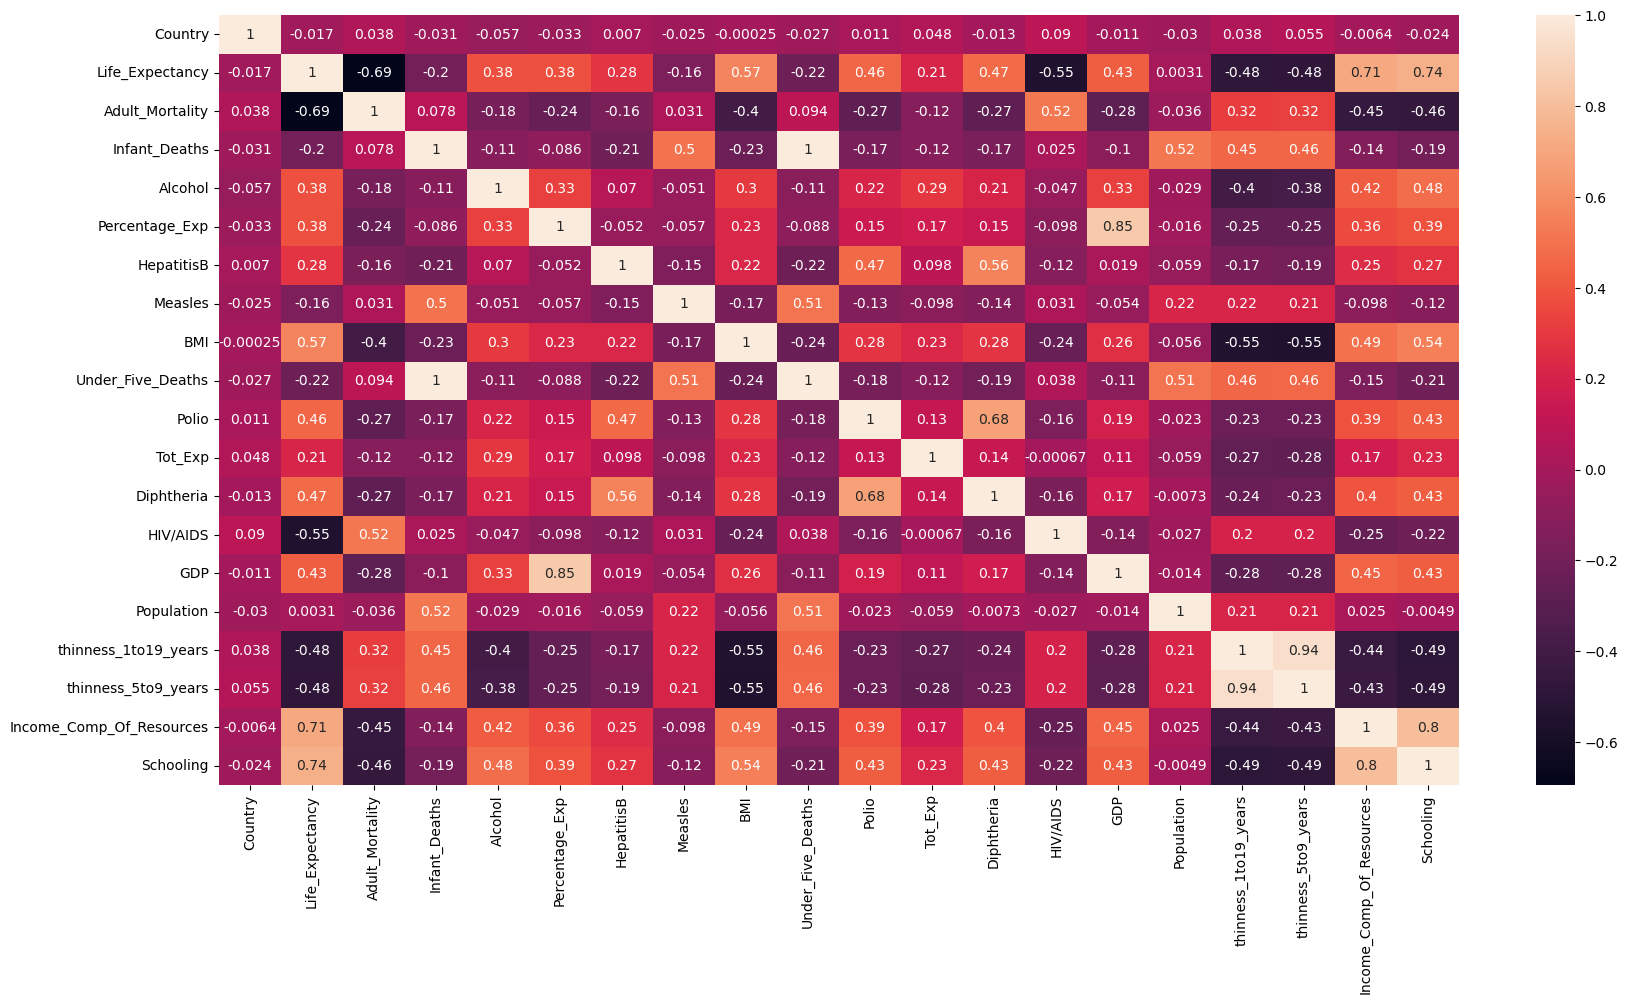

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_fixed_corr, annot=True)

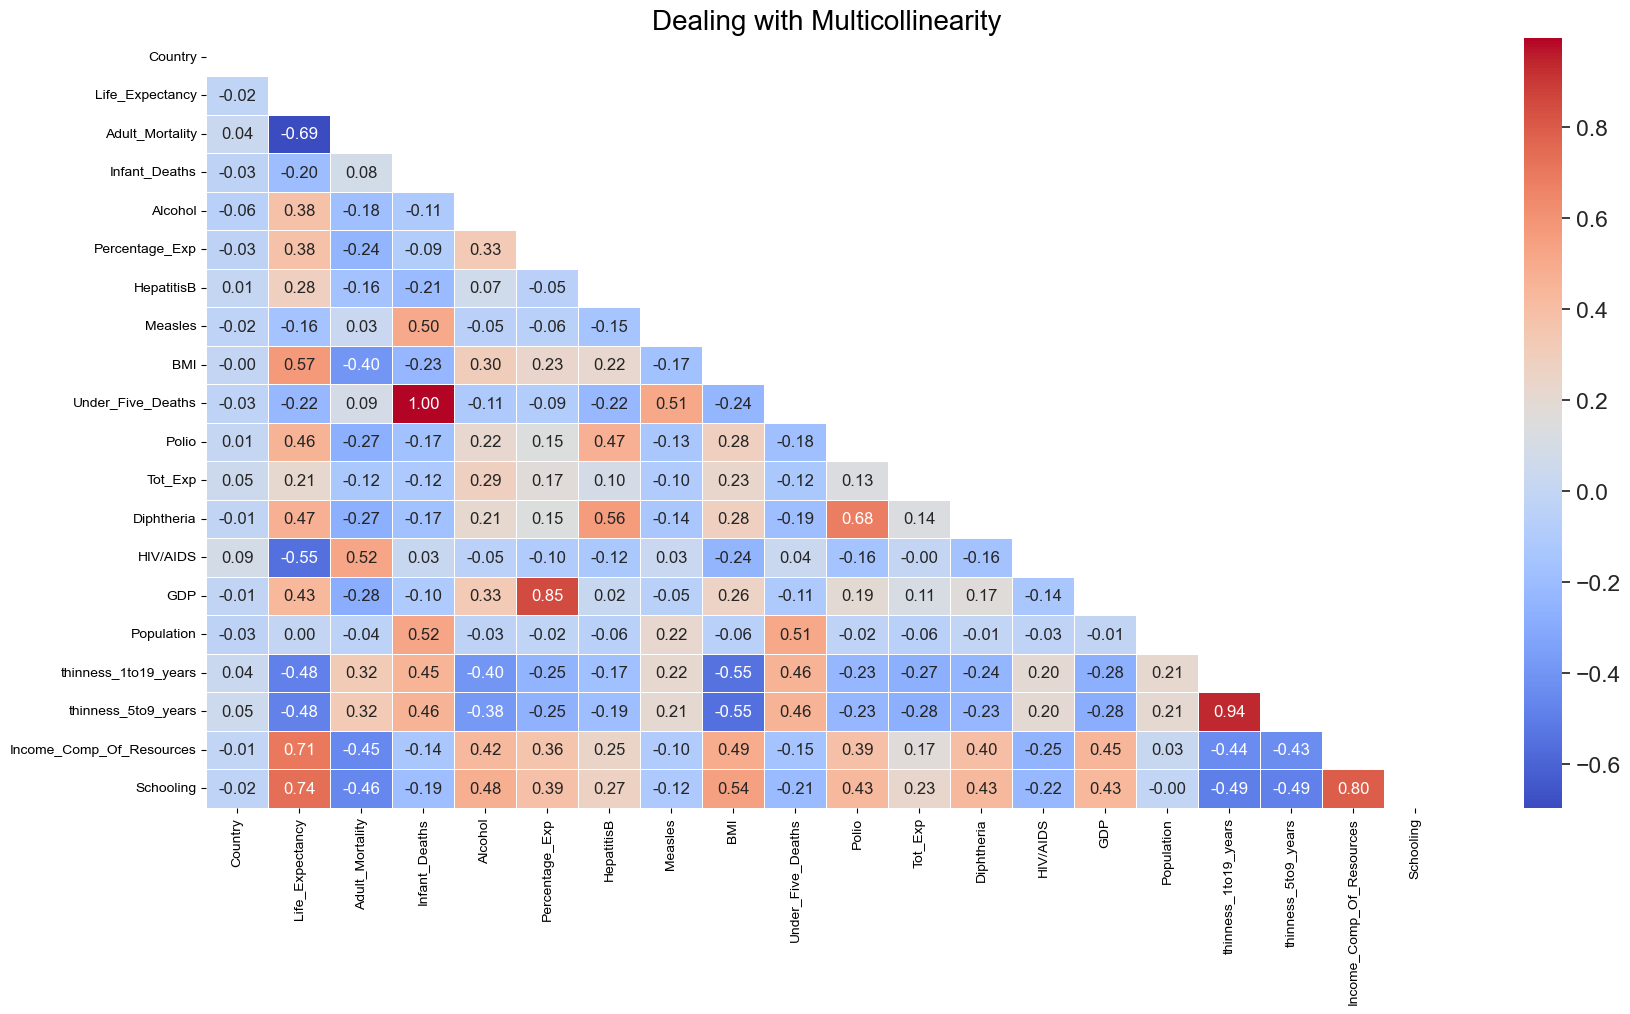

In [21]:
import plotly.express as px
mask = np.zeros_like(df_fixed_corr)
mask[np.triu_indices_from(mask)] = True # to hide half of the matrix
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_fixed_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

In [22]:
# collinear features with respect to life expectancy: thinness_1to19_years & thinness_5to9_years are collinear
and polio & Diphtheria are v. closely related
alcohol(0.38) and percentage expenditure (0.38)are collinear

SyntaxError: invalid syntax (831225662.py, line 2)

In [23]:
# Drop collinear features
df_cleaned = df_fixed.drop(columns=['thinness_1to19_years', 'Diphtheria', 'Percentage_Exp'])

In [24]:
from scipy import stats

numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Calculate Z-scores for all columns
z_scores_all_columns = stats.zscore(numeric_columns)

# Identify outliers using a threshold (e.g., 3 standard deviations)
outliers_all_columns = (z_scores_all_columns > 3) | (z_scores_all_columns < -3)

# Display the number of outliers for each column
outliers_counts = outliers_all_columns.sum(axis=0)
print("Number of outliers for each column:")
print(outliers_counts)

Number of outliers for each column:
Country                       0
Life_Expectancy               2
Adult_Mortality              40
Infant_Deaths                37
Alcohol                       3
HepatitisB                    0
Measles                      48
BMI                           0
Under_Five_Deaths            34
Polio                       178
Tot_Exp                      30
HIV/AIDS                     69
GDP                          76
Population                   19
thinness_5to9_years          61
Income_Comp_Of_Resources      0
Schooling                    29
dtype: int64


In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Filter only numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['number'])

fig = make_subplots(rows=numeric_columns.shape[1], cols=2)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkblue', 'pink', 'yellow', 'lightgrey', 'lightblue', 'cyan', 'magenta', 'lime', 'brown', 'olive', 'teal', 'salmon', 'sienna', 'indigo']

# Create a loop for histogram plots
for i, col in enumerate(numeric_columns.columns):
    fig.add_trace(go.Histogram(x=numeric_columns[col], name=col, marker=dict(color=colors[i])), row=i+1, col=1)

# Create a loop for box plots
for i, col in enumerate(numeric_columns.columns):
    fig.add_trace(go.Box(x=numeric_columns[col], name=col, marker=dict(color=colors[i])), row=i+1, col=2)

# Adjust the height, width, and title of the layout
fig.update_layout(height=200 * numeric_columns.shape[1], width=1000, title_text="Numeric Columns Distributions")

In [ ]:
print(df_cleaned[['Adult_Mortality','Infant_Deaths','Measles','Under_Five_Deaths','Polio', 'Tot_Exp', 'HIV/AIDS', 'GDP','Population', 'thinness_5to9_years', 'Schooling']].mean())

# 1. Get the IQR
IQR = df_cleaned[['Adult_Mortality','Infant_Deaths','Measles','Under_Five_Deaths','Polio', 'Tot_Exp', 'HIV/AIDS', 'GDP','Population', 'thinness_5to9_years', 'Schooling']].quantile(0.75) - df_cleaned[['Adult_Mortality','Infant_Deaths','Measles','Under_Five_Deaths','Polio', 'Tot_Exp', 'HIV/AIDS', 'GDP','Population', 'thinness_5to9_years', 'Schooling']].quantile(0.25)
print(IQR)

# 2. Get the bounds
lower_bound = df_cleaned[['Adult_Mortality','Infant_Deaths','Measles','Under_Five_Deaths','Polio', 'Tot_Exp', 'HIV/AIDS', 'GDP','Population', 'thinness_5to9_years', 'Schooling']].quantile(0.25) - IQR * 1.5
upper_bound = df_cleaned[['Adult_Mortality','Infant_Deaths','Measles','Under_Five_Deaths','Polio', 'Tot_Exp', 'HIV/AIDS', 'GDP','Population', 'thinness_5to9_years', 'Schooling']].quantile(0.75) + IQR * 1.5

# 2. Create pandas condition
condition_1 = df_cleaned[['Adult_Mortality','Infant_Deaths','Measles','Under_Five_Deaths','Polio', 'Tot_Exp', 'HIV/AIDS', 'GDP','Population', 'thinness_5to9_years', 'Schooling']] < lower_bound
condition_2 = df_cleaned[['Adult_Mortality','Infant_Deaths','Measles','Under_Five_Deaths','Polio', 'Tot_Exp', 'HIV/AIDS', 'GDP','Population', 'thinness_5to9_years', 'Schooling']] > upper_bound

# 3. Apply to profit column
df_final = df_cleaned[~(condition_1 | condition_2).any(axis=1)]
df_final

Adult_Mortality        1.648165e+02
Infant_Deaths          3.030395e+01
Measles                2.419592e+03
Under_Five_Deaths      4.203574e+01
Polio                  8.230769e+01
Tot_Exp                5.905211e+00
HIV/AIDS               1.742103e+00
GDP                    7.475594e+03
Population             1.316870e+07
thinness_5to9_years    5.002553e+00
Schooling              1.193567e+01
dtype: float64
Adult_Mortality        1.540000e+02
Infant_Deaths          2.200000e+01
Measles                3.602500e+02
Under_Five_Deaths      2.800000e+01
Polio                  2.000000e+01
Tot_Exp                3.180000e+00
HIV/AIDS               7.000000e-01
GDP                    5.997295e+03
Population             7.257680e+06
thinness_5to9_years    5.700000e+00
Schooling              4.000000e+00
dtype: float64


Country       Year      Status  Life_Expectancy  Adult_Mortality  \
16          1 2015-01-01  Developing             77.8             74.0   
17          1 2014-01-01  Developing             77.5              8.0   
18          1 2013-01-01  Developing             77.2             84.0   
19          1 2012-01-01  Developing             76.9             86.0   
20          1 2011-01-01  Developing             76.6             88.0   
...       ...        ...         ...              ...              ...   
2897      190 2008-01-01  Developing             63.8            238.0   
2898      190 2007-01-01  Developing             63.4             24.0   
2903      190 2002-01-01  Developing             61.5             25.0   
2904      190 2001-01-01  Developing             61.1            251.0   
2905      190 2000-01-01  Developing             68.0            252.0   

      Infant_Deaths  Alcohol  HepatitisB  Measles   BMI  Under_Five_Deaths  \
16                0     4.60        99.0        0  58.0                  0   
17                0     4.51        98.0        0  57.2                  1   
18                0     4.76        99.0        0  56.5                  1   
19                0     5.14        99.0        9  55.8                  1   
20                0     5.37        99.0       28  55.1                  1   
...             ...      ...         ...      ...   ...                ...   
2897             37     0.04        78.0        7  35.7                 47   
2898             38     0.05        79.0       13  35.1                 49   
2903             45     0.07        31.0      890  32.2                 61   
2904             46     0.08        19.0      485  31.7                 63   
2905             48     0.07        14.0        0  31.2                 66   

      Polio  Tot_Exp  HIV/AIDS          GDP  Population  thinness_5to9_years  \
16     99.0     6.00       0.1  3954.227830     28873.0                  1.3   
17     98.0     5.88       0.1  4575.763787    288914.0                  1.3   
18     99.0     5.66       0.1  4414.723140    289592.0                  1.4   
19     99.0     5.59       0.1  4247.614380      2941.0                  1.4   
20     99.0     5.71       0.1  4437.178680    295195.0                  1.5   
...     ...      ...       ...          ...         ...                  ...   
2897   78.0     5.12       0.1  1469.849149     18563.0                 13.7   
2898   79.0     4.92       0.1  1469.849149     18563.0                 13.8   
2903   64.0     4.22       0.1  1469.849149     18563.0                 14.0   
2904   73.0     4.34       0.1  1469.849149     18563.0                 14.0   
2905   74.0     4.14       0.1  1469.849149     18563.0                 14.1   

      Income_Comp_Of_Resources  Schooling  
16                       0.762       14.2  
17                       0.761       14.2  
18                       0.759       14.2  
19                       0.752       14.2  
20                       0.738       13.3  
...                        ...        ...  
2897                     0.480        8.5  
2898                     0.477        8.6  
2903                     0.450        8.0  
2904                     0.444        7.9  
2905                     0.436        7.7  

[1283 rows x 19 columns]

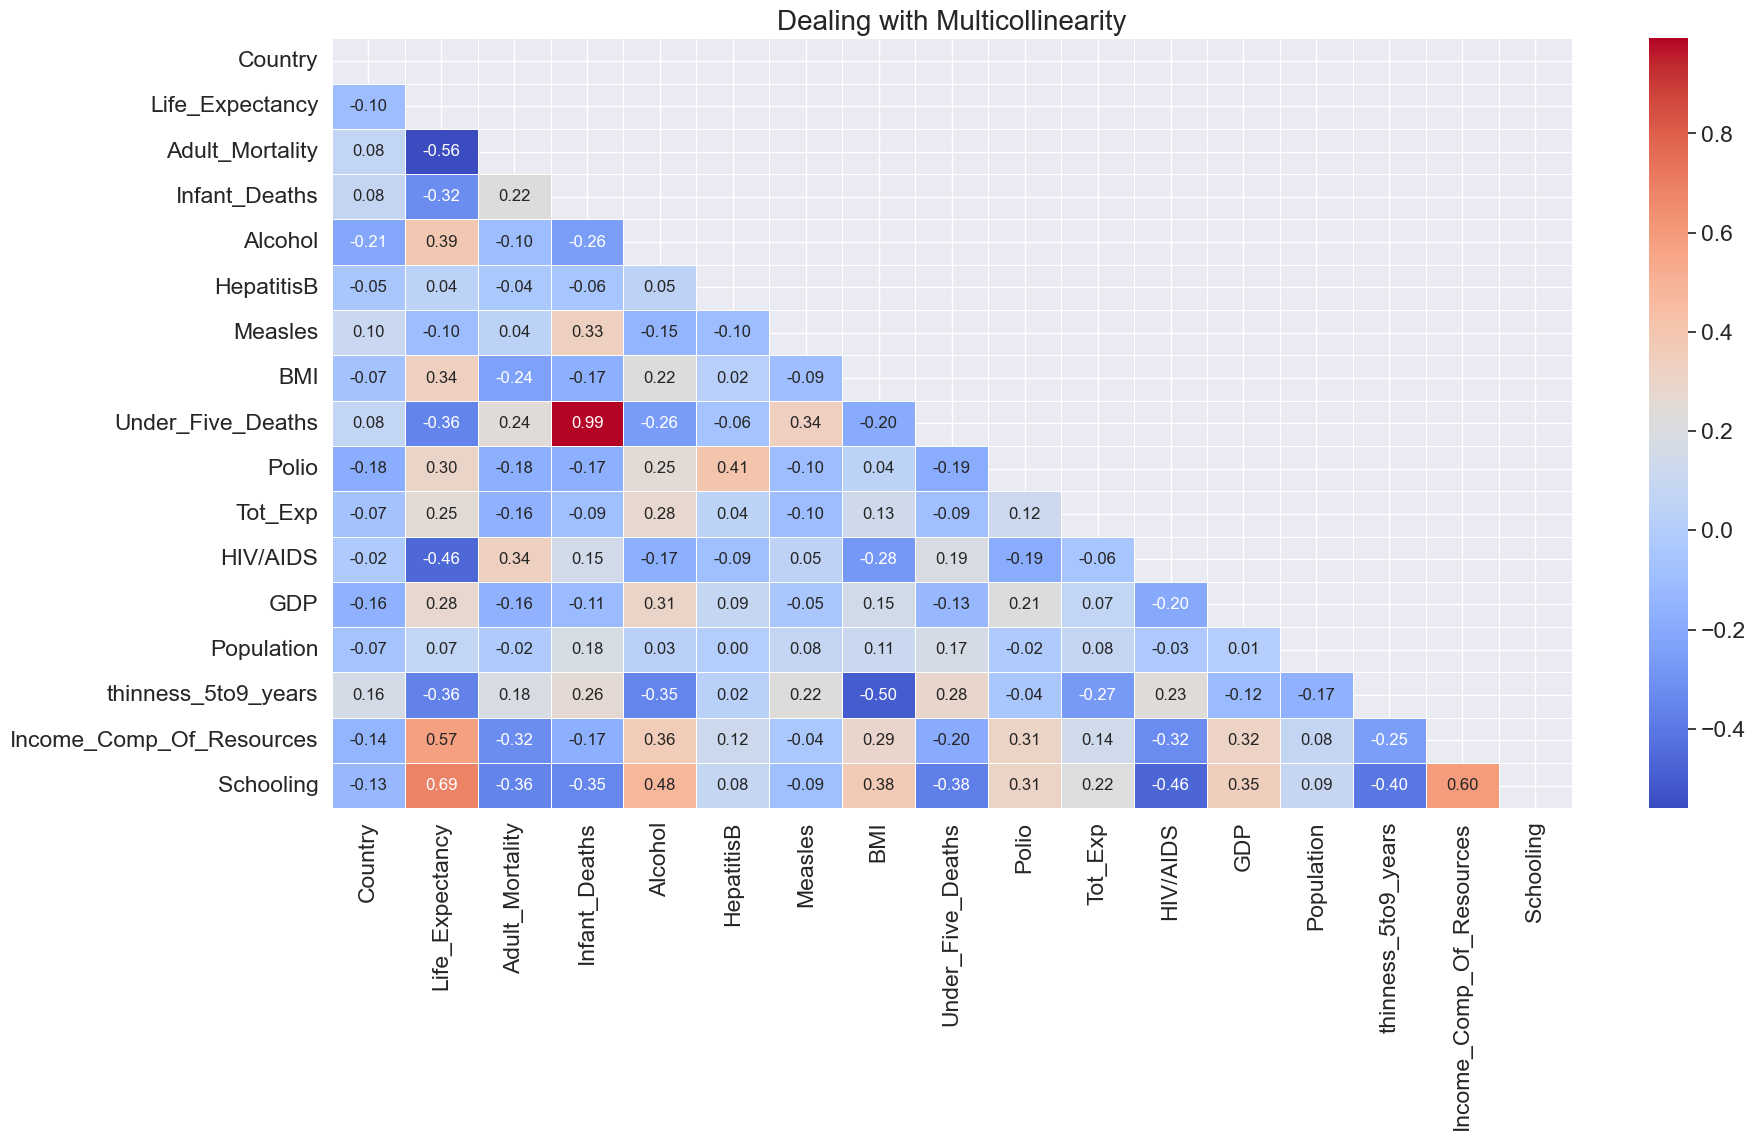

In [29]:
import plotly.express as px
df_final_corr = df_final.corr(numeric_only=True)
mask = np.zeros_like(df_final_corr)
mask[np.triu_indices_from(mask)] = True # to hide half of the matrix
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_final_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

Observation: Adult_Mortality and Infant_Deaths are closely related

In [311]:
#df_final = df_final.copy()
#df_final.drop('Infant_Deaths',axis=1,inplace=True)

In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Filter only numeric columns
numeric_columns = df_final.select_dtypes(include=['number'])

fig = make_subplots(rows=numeric_columns.shape[1], cols=2)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkblue', 'pink', 'yellow', 'lightgrey', 'lightblue', 'cyan', 'magenta', 'lime', 'olive', 'teal', 'salmon','Brown']

# Create a loop for histogram plots
for i, col in enumerate(numeric_columns.columns):
    fig.add_trace(go.Histogram(x=numeric_columns[col], name=col, marker=dict(color=colors[i])), row=i+1, col=1)

# Create a loop for box plots
for i, col in enumerate(numeric_columns.columns):
    fig.add_trace(go.Box(x=numeric_columns[col], name=col, marker=dict(color=colors[i])), row=i+1, col=2)

# Adjust the height, width, and title of the layout
fig.update_layout(height=200 * numeric_columns.shape[1], width=1000, title_text="Numeric Columns Distributions")

In [31]:
df_final['Life_Expectancy'].describe()

count    1283.000000
mean       72.550740
std         5.626803
min        47.100000
25%        69.200000
50%        73.200000
75%        75.700000
max        89.000000
Name: Life_Expectancy, dtype: float64

In [32]:
df_final = df_final.copy()
df_final.drop(['Year'], axis=1,inplace=True)

In [33]:
# Linear Regression Model

In [34]:
# X-y split
X = df_final.drop(['Life_Expectancy'], axis=1)
y = df_final['Life_Expectancy']

In [35]:
X_cat = X.select_dtypes('object')
X_cat.head()

Status
16  Developing
17  Developing
18  Developing
19  Developing
20  Developing

In [36]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)
X_cat_encoded.head()

Status_Developing
16                  1
17                  1
18                  1
19                  1
20                  1

In [37]:
X_num = X.select_dtypes(np.number)
X_num.head()

Country  Adult_Mortality  Infant_Deaths  Alcohol  HepatitisB  Measles  \
16        1             74.0              0     4.60        99.0        0   
17        1              8.0              0     4.51        98.0        0   
18        1             84.0              0     4.76        99.0        0   
19        1             86.0              0     5.14        99.0        9   
20        1             88.0              0     5.37        99.0       28   

     BMI  Under_Five_Deaths  Polio  Tot_Exp  HIV/AIDS          GDP  \
16  58.0                  0   99.0     6.00       0.1  3954.227830   
17  57.2                  1   98.0     5.88       0.1  4575.763787   
18  56.5                  1   99.0     5.66       0.1  4414.723140   
19  55.8                  1   99.0     5.59       0.1  4247.614380   
20  55.1                  1   99.0     5.71       0.1  4437.178680   

    Population  thinness_5to9_years  Income_Comp_Of_Resources  Schooling  
16     28873.0                  1.3                     0.762       14.2  
17    288914.0                  1.3                     0.761       14.2  
18    289592.0                  1.4                     0.759       14.2  
19      2941.0                  1.4                     0.752       14.2  
20    295195.0                  1.5                     0.738       13.3

In [38]:
# Get preprocessed dataset
X_prep = pd.concat([X_cat_encoded, X_num], axis=1)
X_prep.head()

Status_Developing  Country  Adult_Mortality  Infant_Deaths  Alcohol  \
16                  1        1             74.0              0     4.60   
17                  1        1              8.0              0     4.51   
18                  1        1             84.0              0     4.76   
19                  1        1             86.0              0     5.14   
20                  1        1             88.0              0     5.37   

    HepatitisB  Measles   BMI  Under_Five_Deaths  Polio  Tot_Exp  HIV/AIDS  \
16        99.0        0  58.0                  0   99.0     6.00       0.1   
17        98.0        0  57.2                  1   98.0     5.88       0.1   
18        99.0        0  56.5                  1   99.0     5.66       0.1   
19        99.0        9  55.8                  1   99.0     5.59       0.1   
20        99.0       28  55.1                  1   99.0     5.71       0.1   

            GDP  Population  thinness_5to9_years  Income_Comp_Of_Resources  \
16  3954.227830     28873.0                  1.3                     0.762   
17  4575.763787    288914.0                  1.3                     0.761   
18  4414.723140    289592.0                  1.4                     0.759   
19  4247.614380      2941.0                  1.4                     0.752   
20  4437.178680    295195.0                  1.5                     0.738   

    Schooling  
16       14.2  
17       14.2  
18       14.2  
19       14.2  
20       13.3

In [39]:
# Standardize the entire dataset
from sklearn.preprocessing import StandardScaler
scaler_model = StandardScaler()
X_prep_scaled = pd.DataFrame(scaler_model.fit_transform(X_prep), columns=X_prep.columns)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
model = LinearRegression()

In [42]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [43]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model's performance
r2_score_value = r2_score(y_test, y_pred)
print(r2_score_value)

0.6438017765443954


In [45]:
# Random Forest regresser model

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=1) 
                                
rf_model.fit(X_train, y_train)
print('Train score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

Train score: 0.7725149886522746
Test score: 0.7084409397831759


In [48]:
# let's try cross validation for rf_model
from sklearn.model_selection import cross_validate

# Initialize model and cross validate with 10 folds
results = cross_validate(rf_model, X_train, y_train, cv=10)
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [49]:
# Review test scores per validation set
results['test_score']

array([0.74929433, 0.81294346, 0.75651715, 0.78311629, 0.79963071,
       0.72996688, 0.72147726, 0.68003031, 0.58017129, 0.65132856])

In [50]:
# Review overall test score
results['test_score'].mean()

0.7264476255643855

In [51]:
# XGBoost regresser model

In [52]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [53]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.20, random_state=42)

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  
xgb_reg.fit(X_train, y_train)
score = xgb_reg.score(X_test, y_test)

print('XGBoost Regressor Score:', score)

XGBoost Regressor Score: 0.8706989356064384


In [54]:
print('Train score:', xgb_reg.score(X_train, y_train))
print('Test score:', xgb_reg.score(X_test, y_test))

Train score: 0.999858469708924
Test score: 0.8706989356064384


In [55]:
# Observation: Moodel is looking overfitting. let's try hyperparameter tunning using Grid search. 

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Train score:', grid_search.best_estimator_.score(X_train, y_train))
print('Test score:', grid_search.best_estimator_.score(X_test, y_test))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Train score: 0.9866133638620638
Test score: 0.8749800853991831


In [57]:
# let's try cross validation for xgb_reg
from sklearn.model_selection import cross_validate

# Initialize model and cross validate with 10 folds
results = cross_validate(xgb_reg, X_train, y_train, cv=10)
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [58]:
# Review test scores per validation set
results['test_score']

array([0.85586484, 0.88818359, 0.91406852, 0.91340882, 0.90705664,
       0.89459858, 0.82926881, 0.85822552, 0.84808442, 0.88321282])

In [59]:
# Review overall test score
results['test_score'].mean()

0.8791972572319064

In [60]:
# conclusion: Model is performing well on unseen data.

In [61]:
# Make predictions with the xgb_reg
prediction = xgb_reg.predict(X_test.iloc[[0]])

In [62]:
# Extract the predicted Life Expectancy
predicted_life_expectancy = prediction[0]   

In [64]:
# Assuming 'Country' is the first (and only) element in the prediction array
predicted_country_label = int(round(prediction[0]))  # Round to the nearest integer

# Inverse transform using the label encoded values
predicted_country = le_country.inverse_transform([predicted_country_label])[0]

print('Predicted Life Expectancy:', predicted_life_expectancy)
print('Predicted Country:', predicted_country)

Predicted Life Expectancy: 71.4848
Predicted Country: Guyana


In [65]:
import pickle

In [66]:
#save the model
with open('xgb_reg.pkl', 'wb') as file:
    pickle.dump(xgb_reg, file)

In [67]:
pickle.dump(xgb_reg, open('xgb_reg.pkl', 'wb'))

In [68]:
# load the model
with open('xgb_reg.pkl', 'rb') as file:
    xgb_reg = pickle.load(file)

In [69]:
xgb_reg = pickle.load(open('xgb_reg.pkl', 'rb'))

In [350]:
# save the data
X_train.to_pickle('train_data.pkl')
y_train.to_pickle('train_label.pkl')

X_test.to_pickle('test_data.pkl')
y_test.to_pickle('test_label.pkl')

In [351]:
# load the data
X_train = pd.read_pickle('train_data.pkl')
X_train

Status_Developing  Country  Adult_Mortality  Infant_Deaths  Alcohol  \
271                   1       16            196.0              0     4.79   
2199                  1      144            186.0              0     4.80   
659                   1       41             96.0              1     4.18   
1250                  0       80             64.0              0     0.20   
2554                  1      168            162.0             10     0.01   
...                 ...      ...              ...            ...      ...   
2366                  1      156            188.0              0     1.10   
2548                  1      167            131.0              9     0.93   
2600                  1      170            125.0              0     2.86   
2003                  1      131            166.0              4     6.64   
2596                  1      170             12.0              0     2.07   

      HepatitisB  Measles   BMI  Under_Five_Deaths  Polio  Tot_Exp  HIV/AIDS  \
271         76.0        0   4.8                  0   91.0     3.98       0.3   
2199        31.0        0   4.1                  0   99.0     3.73       0.7   
659         96.0        0  59.9                  1   99.0     9.48       0.1   
1250        95.0        4  62.8                  0   95.0     4.36       0.1   
2554        97.0        0  39.9                 11   94.0     6.88       0.2   
...          ...      ...   ...                ...    ...      ...       ...   
2366         9.0        0  46.4                  0   94.0     7.47       0.1   
2548        82.0      189  46.8                 10   84.0     4.48       0.1   
2600        53.0       36  52.7                  0   96.0     8.52       0.1   
2003        86.0        0  41.3                  4   86.0     5.99       0.1   
2596        53.0        9  54.5                  0   95.0     8.64       0.1   

              GDP  Population  thinness_5to9_years  Income_Comp_Of_Resources  \
271   3364.423711    247315.0                  3.7                     0.668   
2199   216.172747     82573.0                  3.9                     0.000   
659    676.153440      4426.0                  3.3                     0.773   
1250  6664.144000   4676835.0                  0.2                     0.920   
2554   114.459190   8362745.0                  3.7                     0.622   
...           ...         ...                  ...                       ...   
2366  1272.448250     52779.0                  1.2                     0.492   
2548   148.852738   1786638.0                  6.3                     0.610   
2600    27.564826   6295821.0                  2.8                     0.000   
2003  1174.779347     56795.0                  2.3                     0.642   
2596    27.564826   6295821.0                  2.6                     0.000   

      Schooling  
271        11.7  
2199       12.7  
659        14.7  
1250       18.6  
2554       11.3  
...         ...  
2366        9.3  
2548       10.6  
2600       11.7  
2003       12.7  
2596       11.9  

[1026 rows x 17 columns]

In [70]:
#save the LabelEncoder
with open('le_country.pkl', 'wb') as file:
    pickle.dump(le_country, file)

In [71]:
# Load the LabelEncoder
with open('le_country.pkl', 'rb') as file:
    le_country = pickle.load(file)

In [72]:
!pip freeze > requirements.txt